# Finding optimal parameters

Suppose we want to minimize OAR average dose subject to a PTV D95 constraint.
One simple, but inefficient, way is to do a coarse grid search.
Here we only look at modifying the OAR dose and volume parameters, but we could also search over the PTV dose parameter and the OAR and PTV weights.
Of course, the  more parameters (and organs) we add, the more dimensions we have to contend with, so all the more reason to find a more efficient method.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Approved plan results
dose = 2000.0
volume = 10.0
weight = 90.0
average = 318.4594544159879
d95 = 4800.13222492 

In [41]:
# Load results
doses = np.fliplr([np.load('doses_norm.npy')])[0]
volumes = np.fliplr([np.load('volumes_norm.npy')])[0]
oar_avg = np.flipud(np.fliplr(np.load('oar_avg_dv_norm.npy')))
ptv_d95 = np.flipud(np.fliplr(np.load('ptv_d95_dv_norm.npy')))

In [49]:
# Interpolate bad values
oar_avg[2, 1] = (oar_avg[2, 0] + oar_avg[2, 2])/2
ptv_d95[2, 1] = (ptv_d95[2, 0] + ptv_d95[2, 2])/2

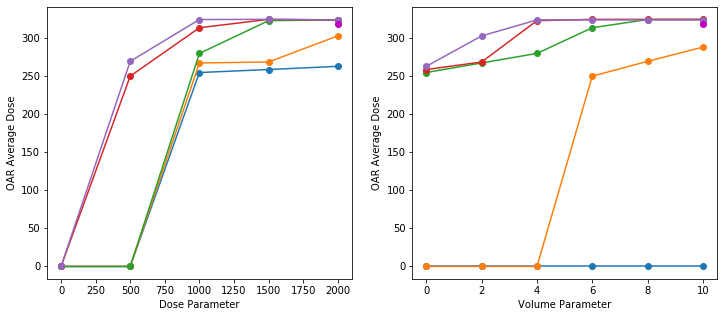

In [50]:
# Plot OAR dose vs. OAR dose and percent parameters 
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for ii in range(len(doses)):
    ax[0].plot(doses, oar_avg[:, ii], 'o-')
    ax[1].plot(volumes, oar_avg[ii, :], 'o-')
ax[0].plot(dose, average, 'mo')
ax[1].plot(volume, average, 'mo')

ax[0].set_xlabel('Dose Parameter')
ax[0].set_ylabel('OAR Average Dose')
ax[1].set_xlabel('Volume Parameter')
ax[1].set_ylabel('OAR Average Dose');

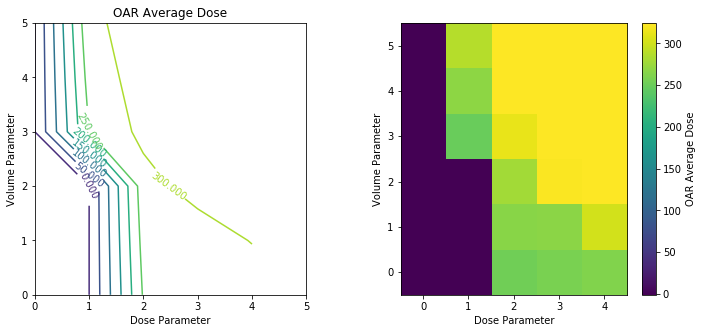

In [51]:
# Plot OAR dose vs. OAR dose and percent parameters
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

im0 = ax[0].contour(oar_avg.T)
ax[0].clabel(im0)
ax[0].set_xlabel('Dose Parameter')
ax[0].set_ylabel('Volume Parameter')
ax[0].set_title('OAR Average Dose')
ax[0].axis('square')

im1 = ax[1].imshow(oar_avg.T, origin='lower')
ax[1].set_xlabel('Dose Parameter')
ax[1].set_ylabel('Volume Parameter')
plt.colorbar(im1, label='OAR Average Dose');

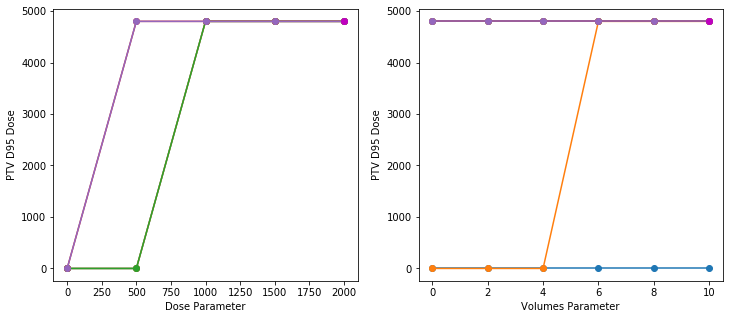

In [52]:
# Plot PTV D95 vs. OAR dose and percent parameters
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for ii in range(len(doses)):
    ax[0].plot(doses, ptv_d95[:, ii], 'o-')
    ax[1].plot(volumes, ptv_d95[ii, :], 'o-')
ax[0].plot(dose, d95, 'mo')
ax[1].plot(volume, d95, 'mo')

ax[0].set_xlabel('Dose Parameter')
ax[0].set_ylabel('PTV D95 Dose')
ax[1].set_xlabel('Volumes Parameter')
ax[1].set_ylabel('PTV D95 Dose');

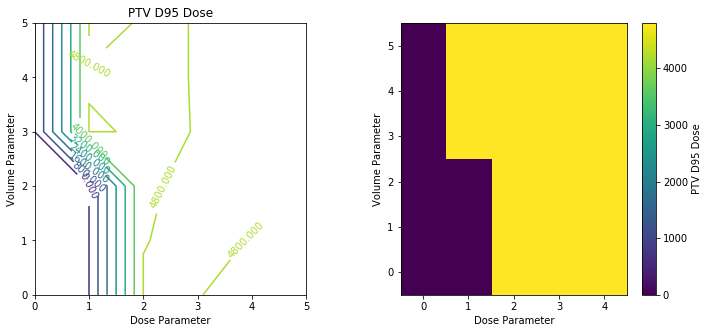

In [53]:
# Plot PTV D95 vs. OAR dose and percent parameters
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

im0 = ax[0].contour(ptv_d95.T)
ax[0].clabel(im0)
ax[0].set_xlabel('Dose Parameter')
ax[0].set_ylabel('Volume Parameter')
ax[0].set_title('PTV D95 Dose')
ax[0].axis('square')

im1 = ax[1].imshow(ptv_d95.T, origin='lower')
ax[1].set_xlabel('Dose Parameter')
ax[1].set_ylabel('Volume Parameter')
plt.colorbar(im1, label='PTV D95 Dose');

Suppose we want to minimize OAR dose subject to PTV D95 dose >= 4800.

In [54]:
min_dose = 1e6
opt_dose = -1
opt_volume = -1
for ii in range(len(doses)):
    for jj in range(len(volumes)):
        if ptv_d95[ii, jj] >= 4800:
            if oar_avg[ii, jj] < min_dose:
                min_dose = oar_avg[ii, jj]
                opt_dose =  doses[ii]
                opt_volume = volumes[jj]
print(f'Dose: {opt_dose}, Volume: {opt_volume}, Min dose: {min_dose}')

Dose: 500.0, Volume: 6.0, Min dose: 249.69768873407617


Since we normalized the PTV D95 to 4800, we really only need to check that the results were valid.

In [60]:
min_dose = 1e6
opt_dose = -1
opt_volume = -1
for ii in range(len(doses)):
    for jj in range(len(volumes)):
        if ptv_d95[ii, jj] > -1 and oar_avg[ii, jj] > -1:
                if oar_avg[ii, jj] < min_dose:
                    min_dose = oar_avg[ii, jj]
                    opt_dose =  doses[ii]
                    opt_volume = volumes[jj]
print(f'Dose: {opt_dose}, Volume: {opt_volume}, Min dose: {min_dose}')

Dose: 500.0, Volume: 6.0, Min dose: 249.69768873407617


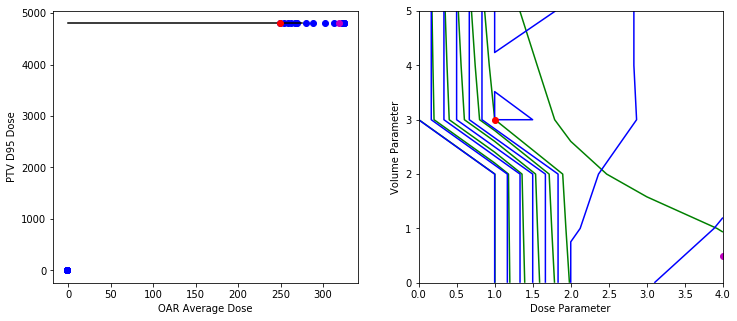

In [67]:
# Plot PTV D95 vs. OAR dose
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for ii in range(len(doses)):
    for jj in range(len(volumes)):
        ax[0].plot(oar_avg[ii, jj], ptv_d95[ii, jj], 'bo')
ax[0].set_xlabel('OAR Average Dose')
ax[0].set_ylabel('PTV D95 Dose')
ax[0].plot([0, 275], [4800, 4800], 'k')
ax[0].plot(oar_avg[1, 3], ptv_d95[1, 3], 'ro')
ax[0].plot(average, d95, 'mo')

ax[1].contour(oar_avg.T, colors='g')
ax[1].contour(ptv_d95.T, colors='b')
ax[1].plot(1, 3, 'ro')
ax[1].plot(4, 0.5, 'mo')
ax[1].set_xlabel('Dose Parameter')
ax[1].set_ylabel('Volume Parameter');

In [70]:
# Run both of my "optimal" plans and see how they compare to the approved plan

In [71]:
# A lot of unknowns related to the plans that couldn't be normalized...